# Analiza i wizualizacja zbiuru MNIST za pomocą t-SNE
Importujemy potrzebne biblioteki¶



In [87]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.decomposition import RandomizedPCA

from sklearn import datasets

from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


Pobieramy dane:

In [88]:
import pandas as pd
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

Możemy zobaczyć ilość i wygląd naszych danych

In [89]:
digits = load_digits()
print(digits.data.shape)
print(digits.images[3])

(1797, 64)
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


Przedstawiamy dane w sposób graficzny:

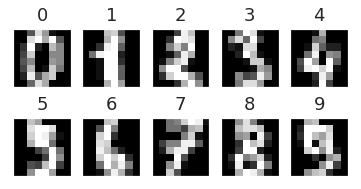

In [90]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

Ustawiamy dane w kolejności od 0 do 9

In [91]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

RS jest ustawionym stanem randomowym. Używamy algorytmu t-SNE, czyli t-distributed stochastic neighbor embedding. Jest on powszechnie wykorzystywany do redukcji wymiarowości podczas wizualizacji. Po więcej informacji odsyłam do: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
https://lvdmaaten.github.io/tsne/

In [92]:
RS = 243534345
digits_proj = TSNE(random_state=RS).fit_transform(X)

Wykonujemy wizualizację odległości podobieństw wyglądu ręcznie pisanych cyfr

In [102]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("cubehelix", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(5.99494,62.2781,'0'),
  Text(-9.30352,-13.6714,'1'),
  Text(25.4074,-42.5726,'2'),
  Text(41.6979,-1.9211,'3'),
  Text(-54.5853,-3.38608,'4'),
  Text(0.661402,19.7615,'5'),
  Text(-31.4998,35.5645,'6'),
  Text(-20.7794,-46.0056,'7'),
  Text(10.7765,-8.28289,'8'),
  Text(29.1583,17.5222,'9')])

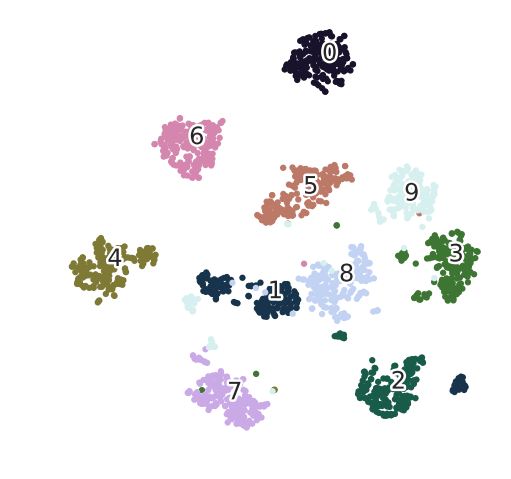

In [103]:
scatter(digits_proj, y)